In [3]:
# Linear Algebra
import numpy as np

# Data Processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# Data Visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path = r'D:\DEPI\Final project\Last\SuperStoreOrders\SuperStoreOrders.csv'
data = pd.read_csv(file_path)

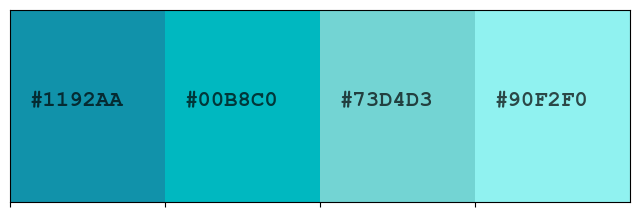

In [7]:
# creating a custom palette
colors = ['#1192AA','#00B8C0', '#73D4D3', '#90F2F0']

sns.palplot(colors)
plt.gcf().set_size_inches(8,2.5)

for idx,values in enumerate(colors):
    plt.text(idx-0.375,0, colors[idx],{'font': "Courier New", 'size':16, 'weight':'bold','color':'black'}, alpha =0.7)
plt.gcf().set_facecolor('white')

plt.show()

In [15]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

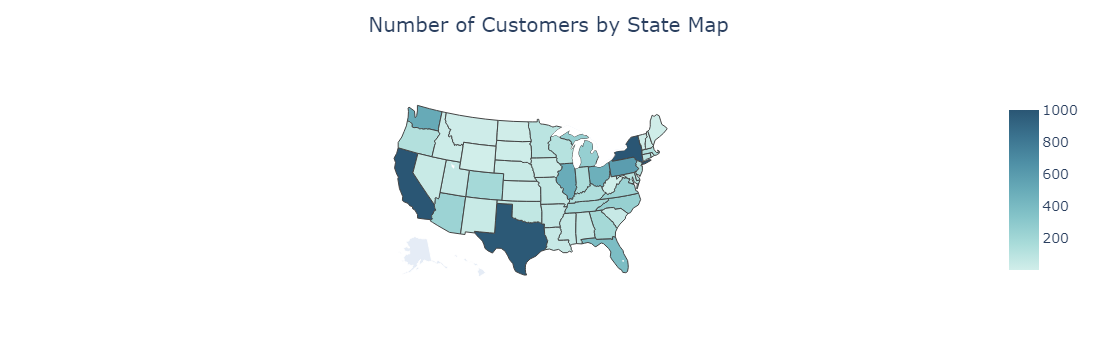

In [19]:
import plotly.graph_objects as go

# Create new column with State Abbreviations
data['State_abb'] = data['state'].replace(us_state_to_abbrev)

# Plot
fig = go.Figure(data=go.Choropleth(
    locations= data['State_abb'].value_counts().index, # Spatial coordinates
    z = data['State_abb'].value_counts(), # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 1000
))

fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Customers by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show()

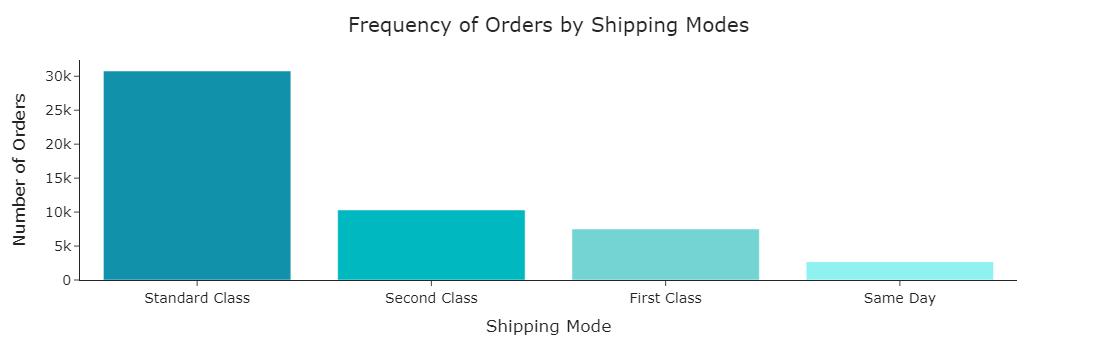

In [23]:
fig = px.bar(x = data['ship_mode'].value_counts().index, y = data['ship_mode'].value_counts(),
             color = data['ship_mode'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Shipping Modes",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

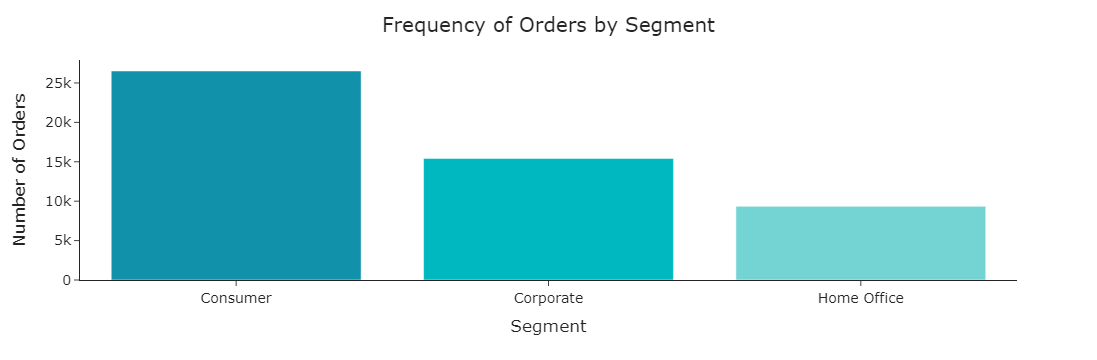

In [25]:
fig = px.bar(x = data['segment'].value_counts().index, y = data['segment'].value_counts(),
             color = data['segment'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

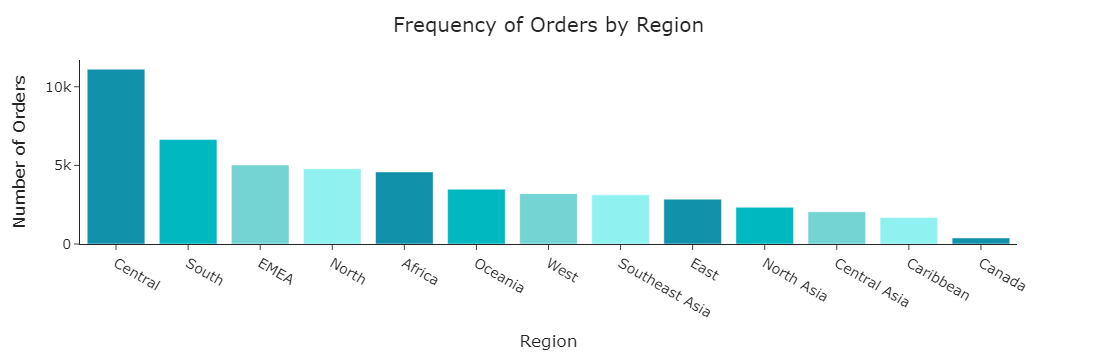

In [27]:
fig = px.bar(x = data['region'].value_counts().index, y = data['region'].value_counts(),
             color = data['region'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Region",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

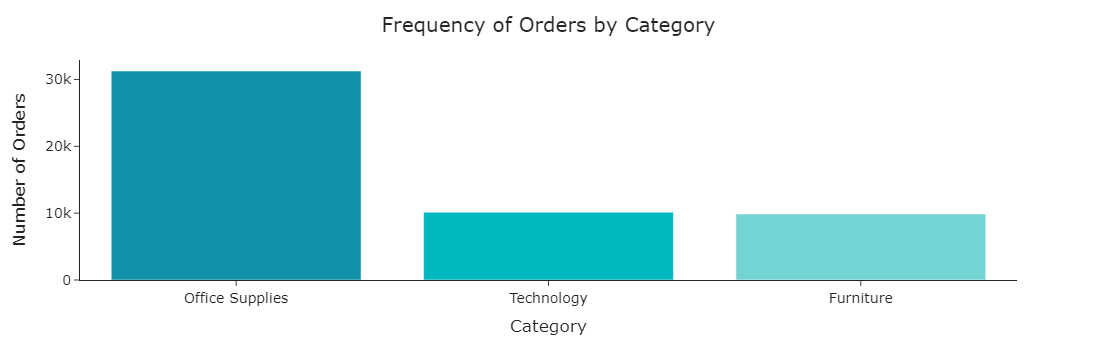

In [29]:
fig = px.bar(x = data['category'].value_counts().index, y = data['category'].value_counts(),
             color = data['category'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

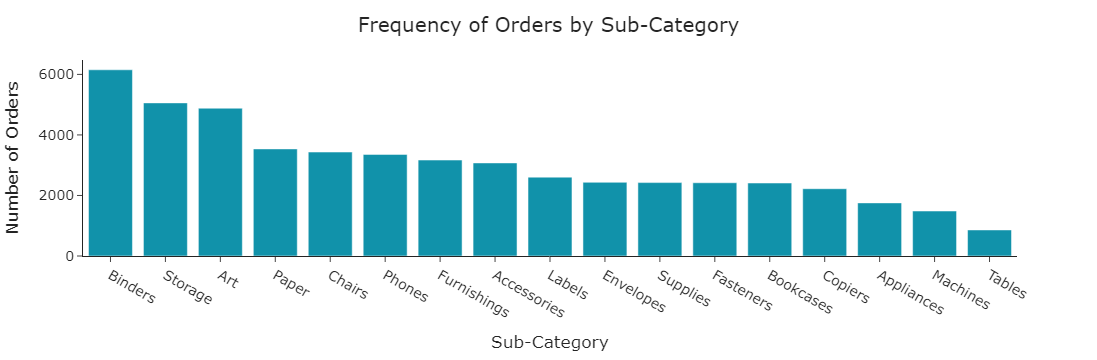

In [31]:
fig = px.bar(x = data['sub_category'].value_counts().index, y = data['sub_category'].value_counts(),
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

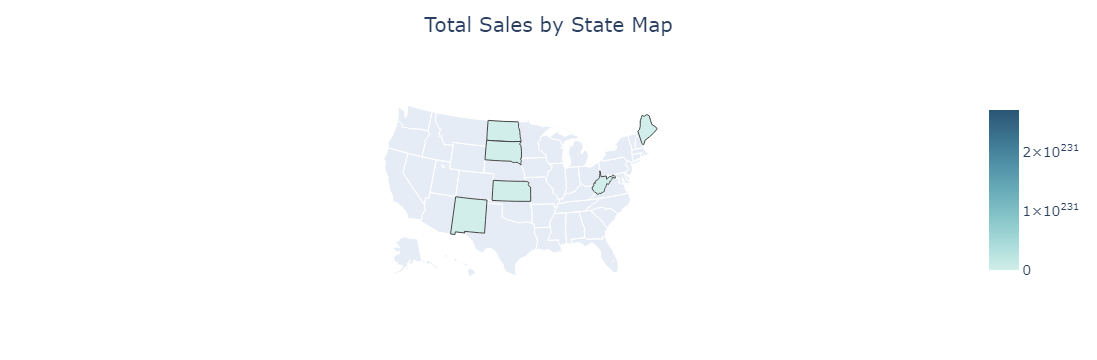

In [33]:
# Create a new table for below analysis

# Make a copy of original table
data_copy = data.copy()

# Group by State_abb and aggrigate sum function on Sales and Profit columns
data_sum_by_states = data_copy[['State_abb', 'sales', 'profit']].groupby('State_abb').sum()

# Reset index
data_sum_by_states.reset_index(inplace=True)

# Plotr
fig = go.Figure(data=go.Choropleth(
    locations= data_sum_by_states['State_abb'], # Spatial coordinates
    z = data_sum_by_states['sales'], # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'teal',
))

fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Sales by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show()

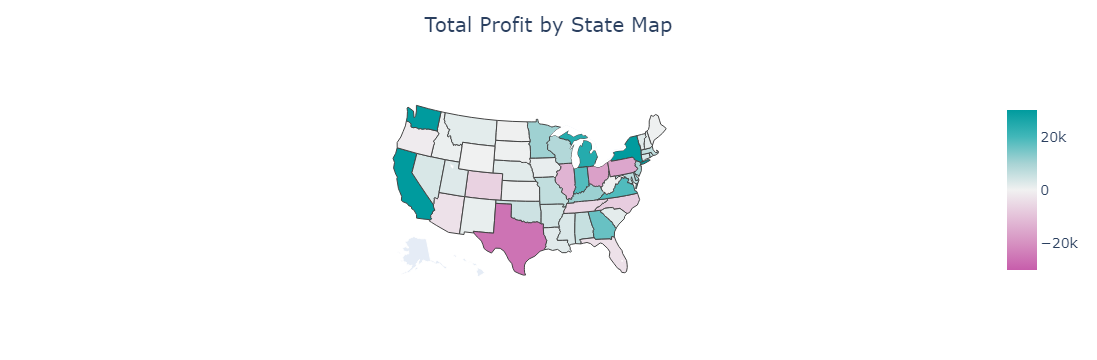

In [35]:
fig = go.Figure(data=go.Choropleth(
    locations= data_sum_by_states['State_abb'], # Spatial coordinates
    z = data_sum_by_states['profit'], # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'tropic_r', zmin = -30000, zmax = 30000
))

fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Profit by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [21]:
# Create a new data table for the chart below

# Make a copy of the original table
data1 = data.copy()

# Split Ship Mode values in unique columns
for ship_mode in data1['ship_mode'].unique():
    data1[ship_mode] = data1.loc[data1['ship_mode'] == ship_mode]['ship_mode']

# Group by State_abb and count
data1 = data1[['State_abb', 'Second Class', 'Standard Class', 'First Class', 'Same Day']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

State_abb  Second Class  Standard Class  First Class  Same Day
0    'Ajman             0               3            1         0
1    'Amman             5              29            4         2
2     'Asir             1               7            0         0

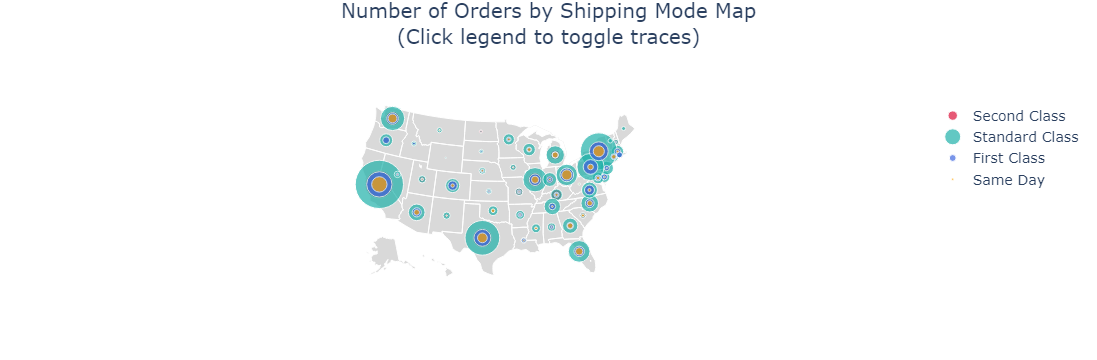

In [25]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ["Second Class", "Standard Class", "First Class", "Same Day"]

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Shipping Mode Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

In [29]:
# Create new data table for chart below

# Make a copy of original table
data1 = data.copy()

# Split Ship Mode values in unique columns
for segment in data1['segment'].unique():
    data1[segment] = data1.loc[data1['segment'] == segment]['segment']

# Group by State_abb and count
data1 = data1[['State_abb', 'Consumer', 'Corporate', 'Home Office']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

State_abb  Consumer  Corporate  Home Office
0    'Ajman         4          0            0
1    'Amman        23         11            6
2     'Asir         2          2            4

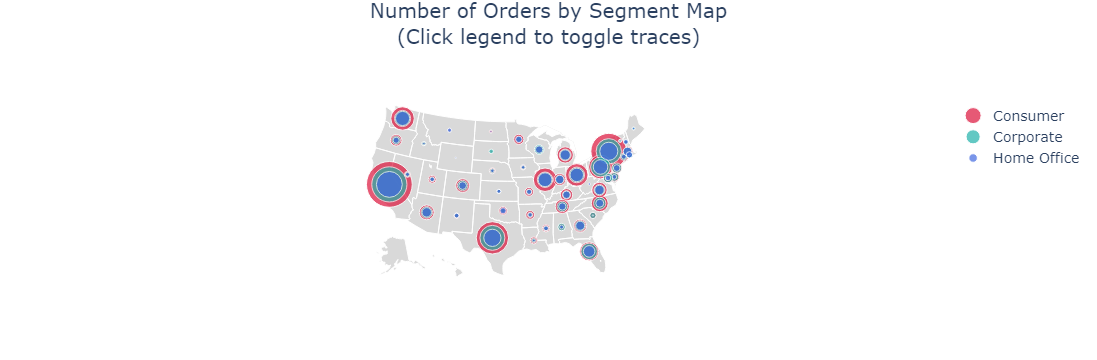

In [31]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ['Consumer', 'Corporate', 'Home Office']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Segment Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

In [35]:
# Create new data table for chart below

# Make a copy of original table
data1 = data.copy()

# Split Ship Mode values in unique columns
for category in data1['category'].unique():
    data1[category] = data1.loc[data1['category'] == category]['category']

# Group by State_abb and count
data1 = data1[['State_abb', 'Furniture', 'Office Supplies', 'Technology']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

State_abb  Furniture  Office Supplies  Technology
0    'Ajman          0                3           1
1    'Amman          7               26           7
2     'Asir          2                5           1

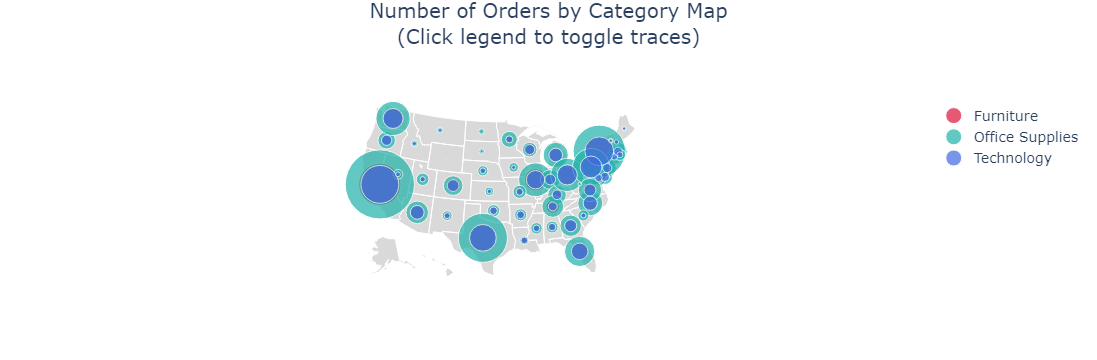

In [37]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ['Furniture', 'Office Supplies', 'Technology']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column]*2,
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()

In [41]:
# Create new data table for chart below

# Make a copy of original table
data1 = data.copy()

# Split Ship Mode values in unique columns
for category in data1['sub_category'].unique():
    data1[category] = data1.loc[data1['sub_category'] == category]['sub_category']

# Group by State_abb and count
data1 = data1[['State_abb', 'Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

State_abb  Bookcases  Chairs  Labels  Tables  Storage  Furnishings  Art  \
0    'Ajman          0       0       1       0        2            0    0   
1    'Amman          4       0       2       0        9            3    3   
2     'Asir          0       1       0       1        0            0    0   

   Phones  Binders  Appliances  Paper  Accessories  Envelopes  Fasteners  \
0       0        0           0      0            0          0          0   
1       0        3           2      1            5          5          0   
2       1        0           0      1            0          0          1   

   Supplies  Machines  Copiers  
0         0         1        0  
1         1         1        1  
2         3         0        0

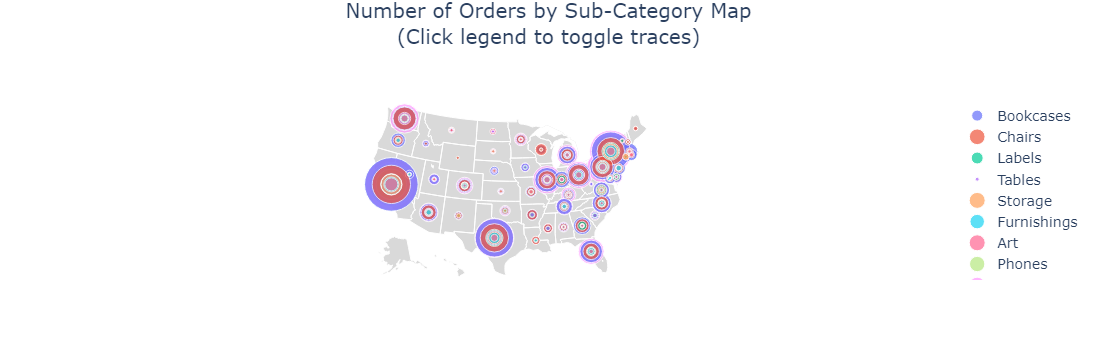

In [43]:
fig = go.Figure()

columns = ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column]*5,
                 #color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Sub-Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show()